# Assignment 2

1, a

Dropping the outliers wich seams to have some other factor affecting the price in a dramatic way

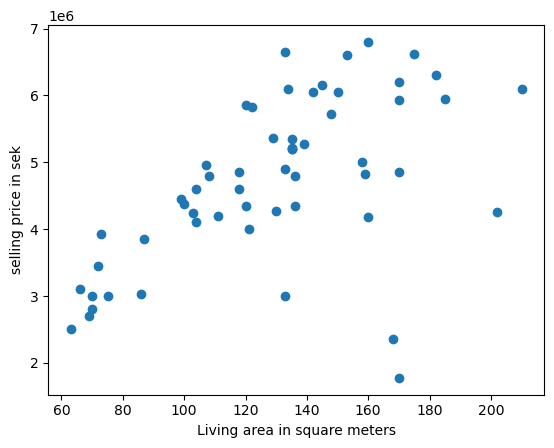

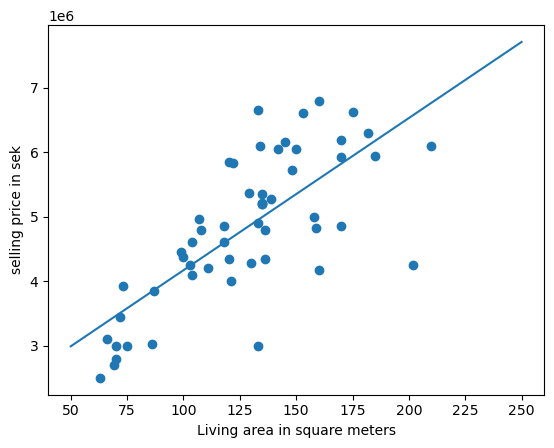

In [104]:

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#import data
df = pd.read_csv("./Datasets\data_assignment2.csv")
#scater plot
xvalues=df['Living_area']
yvalues=df['Selling_price']

plt.xlabel('Living area in square meters')
plt.ylabel('selling price in sek')

plt.scatter(xvalues,yvalues)
plt.show()

#drop outliers
df = df.drop(axis=0, index=40)
df = df.drop(axis=0, index=45)
df.reset_index(drop=True, inplace=True)
#scater plot
xvalues=df['Living_area']
yvalues=df['Selling_price']

plt.xlabel('Living area in square meters')
plt.ylabel('selling price in sek')

plt.scatter(xvalues,yvalues)
#fitting a linear regression model
model = LinearRegression().fit(xvalues.array.reshape(-1,1), yvalues.array.reshape(-1,1))
xfit = np.linspace(50, 250, 1000) #1000 evenly spaced points in [0, 55].
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit)
plt.show()




1 b, values of the slope and intercept of the regression line

In [105]:
slope = model.coef_
print("The slope of the regression line is:",str(slope[0][0]))
intercept = model.intercept_
print("The intercepet of the regression line is:",str(intercept[0]))

The slope of the regression line is: 23597.794749444976
The intercepet of the regression line is: 1809821.2159409611


1 c, predict sell prices

In [106]:
price_for_10 = model.predict([[10]])
price_for_100 = model.predict([[100]])
price_for_150 = model.predict([[150]])
price_for_200 = model.predict([[200]])
price_for_1000 = model.predict([[1000]])
print("The price for a house with 10 square meters is:",str(round(price_for_10[0][0],0)))
print("The price for a house with 100 square meters is:",str(round(price_for_100[0][0],0)))
print("The price for a house with 150 square meters is:",str(round(price_for_150[0][0],0)))
print("The price for a house with 200 square meters is:",str(round(price_for_200[0][0],0)))
print("The price for a house with 1000 square meters is:",str(round(price_for_1000[0][0],0)))


The price for a house with 10 square meters is: 2045799.0
The price for a house with 100 square meters is: 4169601.0
The price for a house with 150 square meters is: 5349490.0
The price for a house with 200 square meters is: 6529380.0
The price for a house with 1000 square meters is: 25407616.0


1 d, Draw residual 

c:\Users\ceder\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


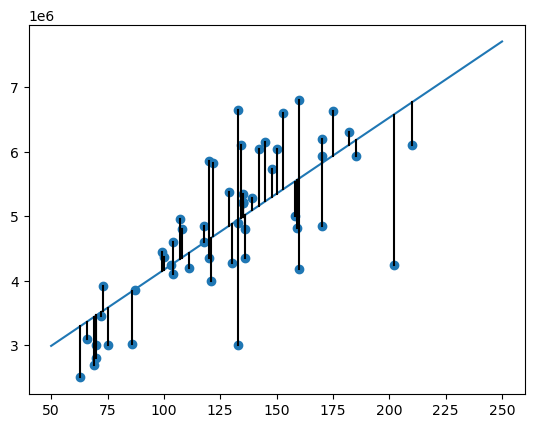

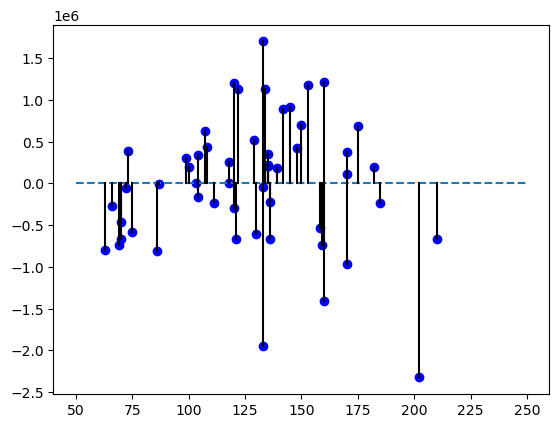

In [107]:
#residual plot not adjusted to the x-axis
yfit_residual = model.predict(xvalues.array.reshape(-1,1))
plt.plot(xfit,yfit)
plt.scatter(xvalues,yvalues)
for i in range(0, len(xvalues)):
    plt.plot([xvalues[i], xvalues[i]], [yvalues[i], yfit_residual[i]], 'k-')
plt.show()

#residual plot adjusted to the x-axis
plt.plot([50,250],[0,0], linestyle='dashed')
for i in range(0, len(xvalues)):
    plt.scatter(xvalues[i], yvalues[i]-yfit_residual[i], color='blue')
    plt.plot([xvalues[i], xvalues[i]], [yvalues[i]- yfit_residual[i], 0], 'k-')

1 e, reflections

In [108]:
from sklearn.metrics import r2_score
r2 =r2_score(yvalues, yfit_residual)
r2

0.540158022507656

The R value is 0,54 wich is not very good, but there is clearly some correlation between price and living area. But because there is many other factors at play the linear correlation is not that clear.

## 2: Iris dataset